What is missing?

- Checking the target distribution, imbalanced or not?
- Some plots to find the correlation among some features and the target (lmplot, and some scatterplot, or boxplots)
- Cardinalities in categorical features
- Check for duplicates


In [12]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

### **Importing libraries**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import histogram_feature, correlation_matrix

### **Importing Data**

In [14]:
train_data = pd.read_csv("../data/train.csv")
train_data.head(10)

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,1048,22,Female,B.Tech,ECE,6.29,0,3,4,6,51,5,1,3,Not Placed
1,37820,20,Female,BCA,ECE,6.05,1,4,6,8,59,8,2,1,Not Placed
2,49668,22,Male,MCA,ME,7.22,1,4,6,6,58,6,2,2,Not Placed
3,19467,22,Male,MCA,ME,7.78,2,4,6,6,90,4,2,0,Placed
4,23094,20,Female,B.Tech,ME,7.63,1,4,6,5,79,6,2,0,Placed
5,8710,20,Male,BCA,ECE,7.99,1,4,5,7,84,6,2,0,Placed
6,24363,21,Male,MCA,ECE,7.50,1,4,6,4,71,8,2,1,Not Placed
7,27448,19,Male,B.Tech,ME,8.00,0,4,4,5,74,3,1,0,Not Placed
8,23663,24,Male,BCA,Civil,6.24,0,3,3,10,54,7,1,2,Not Placed
9,39336,23,Male,B.Sc,ME,7.08,2,4,7,6,59,6,2,2,Not Placed


### **Understanding the dataset**

In [15]:
train_data.shape

(45000, 15)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            45000 non-null  int64  
 1   Age                   45000 non-null  int64  
 2   Gender                45000 non-null  object 
 3   Degree                45000 non-null  object 
 4   Branch                45000 non-null  object 
 5   CGPA                  45000 non-null  float64
 6   Internships           45000 non-null  int64  
 7   Projects              45000 non-null  int64  
 8   Coding_Skills         45000 non-null  int64  
 9   Communication_Skills  45000 non-null  int64  
 10  Aptitude_Test_Score   45000 non-null  int64  
 11  Soft_Skills_Rating    45000 non-null  int64  
 12  Certifications        45000 non-null  int64  
 13  Backlogs              45000 non-null  int64  
 14  Placement_Status      45000 non-null  object 
dtypes: float64(1), int6

- Within the **features** we have 3 **object** type columns and 11 **numerical** columns
- As we can see we don't have any **null values** in the dataset

In [17]:
train_data.isna().sum()

Student_ID              0
Age                     0
Gender                  0
Degree                  0
Branch                  0
CGPA                    0
Internships             0
Projects                0
Coding_Skills           0
Communication_Skills    0
Aptitude_Test_Score     0
Soft_Skills_Rating      0
Certifications          0
Backlogs                0
Placement_Status        0
dtype: int64

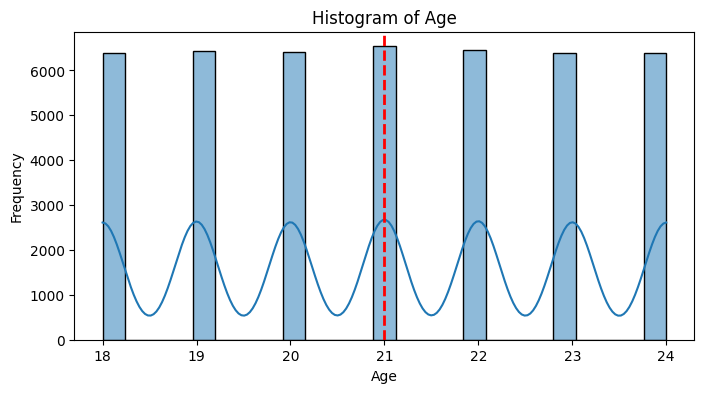

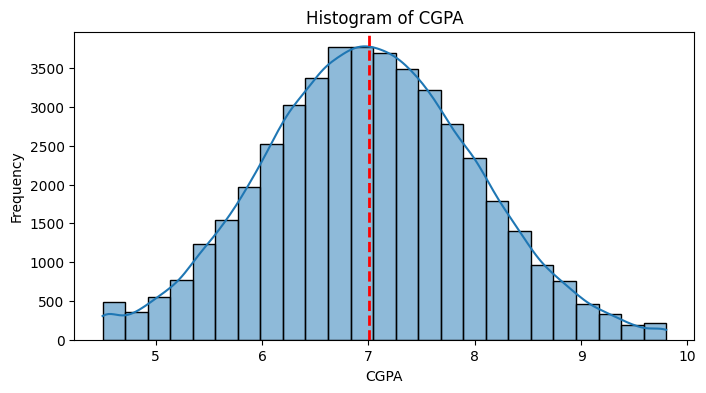

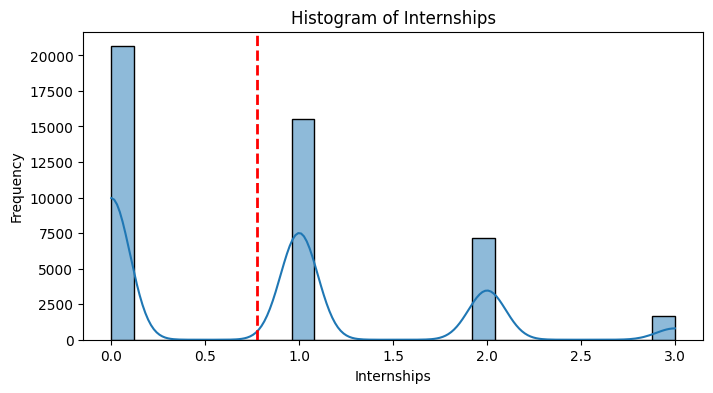

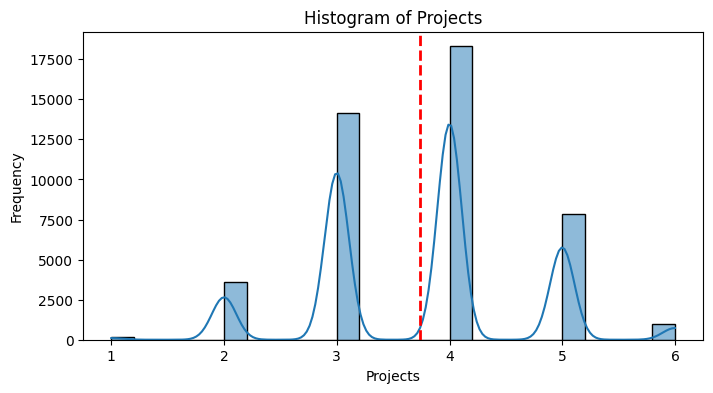

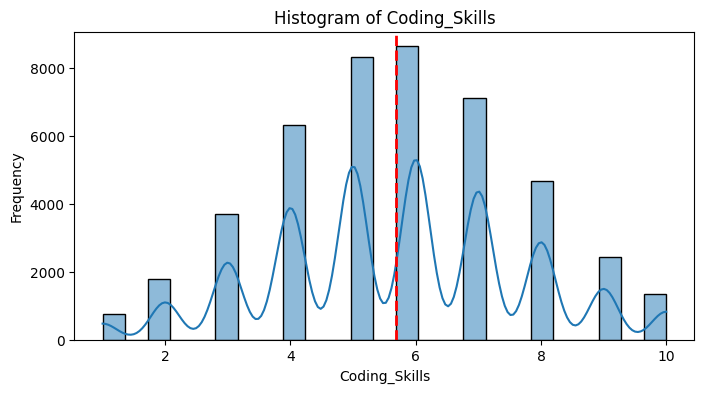

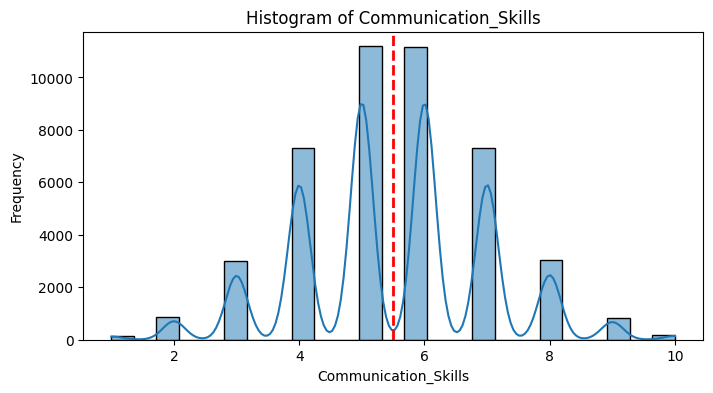

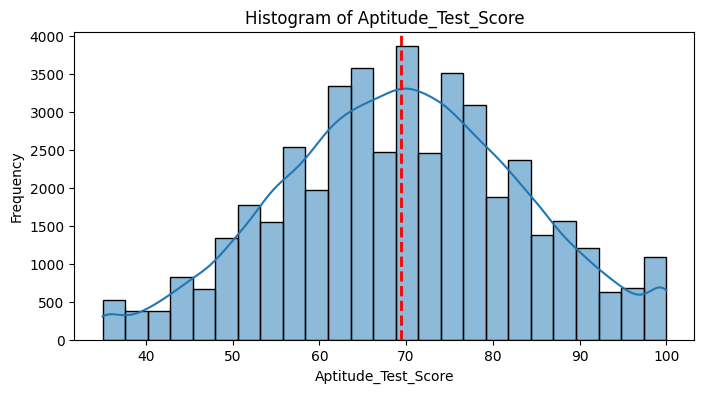

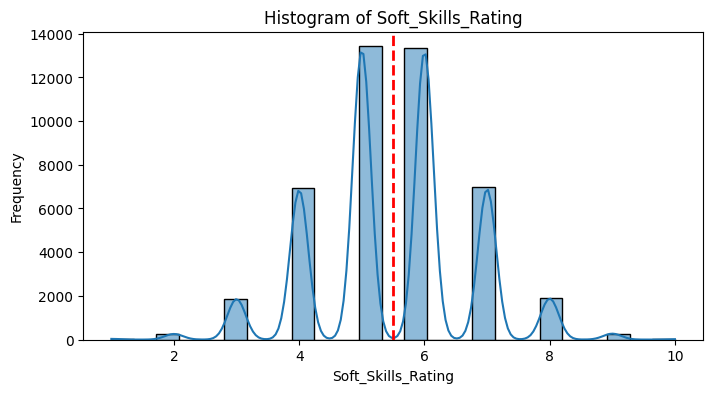

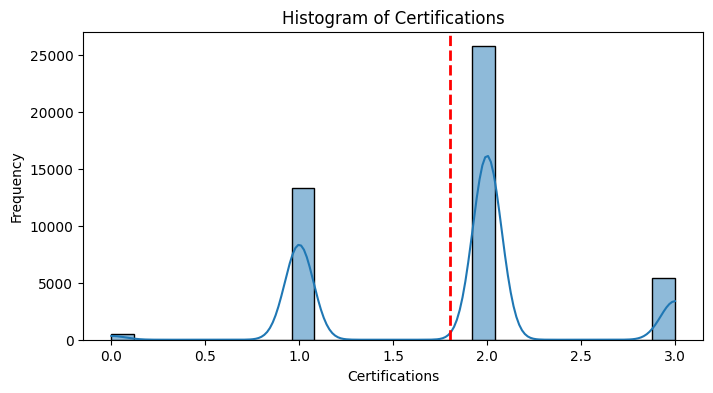

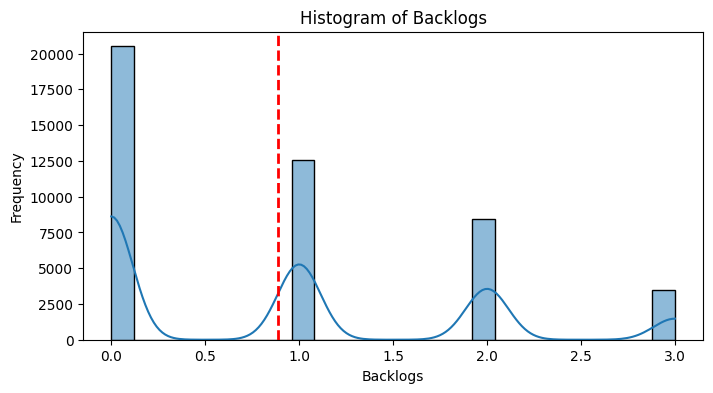

In [18]:
histogram_feature(data=train_data, bins = 25)

- As shown in the previous plot most of our numerical features follow a Normal or Gaussian Distribution.
- Also there are 2 features that are right-skewed: **backlogs** and  **internships** (**log** transformation)
- There aren't **outliers** in this dataset 

### **Feature Correlation**

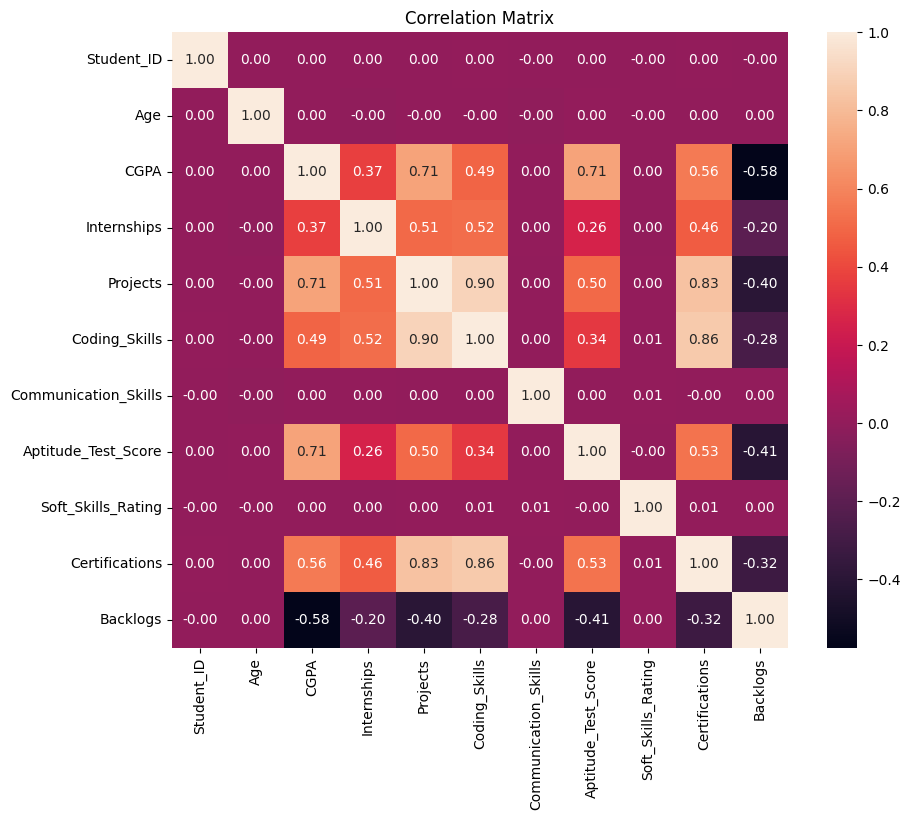

In [19]:
correlation_matrix(data=train_data)

- There are 2 features that doesn't have any linear correlation (Pearson's matrix) with the others: **Student_ID** (obviously) and the **age** (maybe because age is a constant through all the dataset, we have the same amount of students that are 18, 19 ... and 24 y/o)
- We have strong positive correlation among the **certifications**, **projects** and **coding_skills** features. Also among **CGPA** and **Aptitude_Test_Score**